**Praktikum Teori Graf (C)**

Anggota Kelompok :


1.   Mandy Alphafyn Imanuel Tjandra (5025241173)
2.   Afsal Murtaza (5025241190)
3.   Muhammad Daffa Ramadhan (5025241216)


Soal :

Jika sebuah bidak kuda diletakkan pada sebarang kotak untuk kemudian melakukan perjalanan (dengan cara pergerakan kuda) mengunjungi ke semua (8 x 8) kotak papan catur.

Jika diinginkan situasi bahwa kuda tsb dapat :


*   Mengakhiri perjalanan di sembarang kotak (open tour)
*   Mengakhiri perjalanan pada attacking square (closed tour)

Maka aplikasikan algoritma untuk menyelesaikan masalah di atas ke dalam sebuah program dengan menunjukkan rute perjalanan seperti gambar di PPT.




In [ ]:
import matplotlib.pyplot as plt
import sys

# Tingkatkan batas rekursi untuk keamanan (meskipun Warnsdorff jarang butuh deep recursion)
sys.setrecursionlimit(2000)

**Import dan Pengaturan Awal :**


*   Imatplotlib.pyplot : Library untuk membuat visualisasi grafis papan catur dan jalur kuda
*   sys.setrecursionlimit(2000) : Meningkatkan batas rekursi Python untuk mengantisipasi kasus yang memerlukan rekursi dalam (meskipun algoritma Warnsdorff biasanya tidak memerlukan rekursi yang sangat dalam)



In [ ]:
class KnightsTour:
    def __init__(self, size=8):
        self.n = size
        # 8 kemungkinan gerakan kuda (L-shape)
        self.moves = [
            (2, 1), (1, 2), (-1, 2), (-2, 1),
            (-2, -1), (-1, -2), (1, -2), (2, -1)
        ]
        self.board = [[-1 for _ in range(size)] for _ in range(size)]
        self.path = []

**Class KnightsTour :**


*   self.n : Ukuran papan (default 8×8)
*   self.moves : 8 kemungkinan gerakan kuda dalam bentuk "L"
*   self.board : Matriks 8×8 diinisialisasi dengan -1 (menandakan kotak belum dikunjungi)
*   self.path : List untuk menyimpan urutan koordinat kunjungan kuda



In [ ]:
def is_valid(self, x, y):
        """Mengecek apakah langkah berada di dalam papan dan belum dikunjungi."""
        return 0 <= x < self.n and 0 <= y < self.n and self.board[x][y] == -1

**Metode is_valid :**


*   Memeriksa apakah koordinat (x, y) berada dalam batas papan (0-7)
*   Memastikan kotak tersebut belum dikunjungi (nilai -1)




In [ ]:
def solve(self, start_x, start_y):
        """Fungsi utama untuk mencari solusi."""
        # Reset board
        self.board = [[-1 for _ in range(self.n)] for _ in range(self.n)]
        self.path = []

        # Langkah pertama
        self.board[start_x][start_y] = 0
        self.path.append((start_x, start_y))

        if self.solve_util(start_x, start_y, 1):
            return True
        return False

**Metode solve (Fungsi Utama) :**


*   Inisialisasi Pencarian : Mereset papan dan jalur, kemudian menandai kotak awal sebagai langkah ke-0 dan menambahkannya ke jalur.
*   Memulai Rekursi : Memanggil fungsi solve_util untuk melanjutkan pencarian dari langkah ke-1. Jika berhasil, mengembalikan True.



In [ ]:
    def solve_util(self, x, y, move_count):
        """Fungsi rekursif dengan Heuristik Warnsdorff."""
        if move_count == self.n * self.n:
            return True

        # Cari semua langkah yang mungkin
        next_moves = []
        for dx, dy in self.moves:
            nx, ny = x + dx, y + dy
            if self.is_valid(nx, ny):
                # Hitung degree (jumlah langkah selanjutnya yang mungkin)
                degree = 0
                for ddx, ddy in self.moves:
                    # Cek validitas langkah berikutnya dari nx, ny
                    if 0 <= nx + ddx < self.n and 0 <= ny + ddy < self.n and self.board[nx+ddx][ny+ddy] == -1:
                        degree += 1
                next_moves.append((degree, nx, ny))

        # Heuristik Warnsdorff: Urutkan berdasarkan degree terendah (ascending)
        next_moves.sort(key=lambda x: x[0])

        # Mulai Backtracking
        for _, nx, ny in next_moves:
            self.board[nx][ny] = move_count
            self.path.append((nx, ny))

            if self.solve_util(nx, ny, move_count + 1):
                return True

            # Backtracking
            self.board[nx][ny] = -1
            self.path.pop()

        return False

**Metode solve_util (Inti Algoritma Warnsdorff & Backtracking) :**

*   Base Case : Jika move_count sama dengan jumlah total kotak (64 untuk papan 8x8), maka tour selesai.
*   Mencari Langkah Berikutnya : Untuk setiap gerakan yang mungkin dari posisi saat ini, hitung degree (jumlah langkah selanjutnya yang mungkin dari posisi tersebut). Ini adalah inti heuristik Warnsdorff: memilih langkah yang memiliki jumlah langkah selanjutnya paling sedikit untuk menghindari jalan buntu.
*   Pengurutan : Langkah-langkah diurutkan berdasarkan degree terkecil.
*   Rekursi dan Backtracking : Untuk setiap langkah yang mungkin (dari yang terbaik), tandai kotak tersebut dengan move_count, tambahkan ke jalur, lalu lanjutkan rekursi. Jika rekursi gagal, lakukan backtracking: hapus tanda dan keluarkan dari jalur.



In [ ]:
    def visualize_tour(self):
        """Membuat grafik visualisasi perjalanan kuda."""
        if not self.path:
            print("Tidak ada jalur untuk divisualisasikan.")
            return

        fig, ax = plt.subplots(figsize=(8, 8))

        # Gambar Grid Papan Catur
        for x in range(self.n + 1):
            ax.plot([x, x], [0, self.n], color='black', linewidth=1)
            ax.plot([0, self.n], [x, x], color='black', linewidth=1)

        # Koordinat jalur (+0.5 agar titik di tengah kotak)
        path_x = [p[1] + 0.5 for p in self.path] # Kolom adalah sumbu X
        path_y = [self.n - p[0] - 0.5 for p in self.path] # Baris adalah sumbu Y (dibalik agar baris 0 di atas)

        # Plot garis perjalanan
        ax.plot(path_x, path_y, color='blue', marker='o', markersize=5, linestyle='-')

        # Tandai Awal (Hijau) dan Akhir (Merah)
        ax.plot(path_x[0], path_y[0], 'go', markersize=12, label='Start')
        ax.plot(path_x[-1], path_y[-1], 'ro', markersize=12, label='End')

        # Beri nomor urut langkah
        for i, (px, py) in enumerate(zip(path_x, path_y)):
            ax.text(px, py, str(i+1), color='white',
                    ha='center', va='center', fontsize=8, fontweight='bold',
                    bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.2'))

        ax.set_xlim(0, self.n)
        ax.set_ylim(0, self.n)
        # Label sumbu agar sesuai matriks (0-7)
        ax.set_xticks([i + 0.5 for i in range(self.n)])
        ax.set_xticklabels(range(self.n))
        ax.set_yticks([self.n - i - 0.5 for i in range(self.n)])
        ax.set_yticklabels(range(self.n))

        ax.set_xlabel("Kolom (y)")
        ax.set_ylabel("Baris (x)")

        plt.title(f"Knight's Tour ({self.n}x{self.n})")
        plt.legend()
        plt.show()

**Metode visualize_tour (Visualisasi) :**

*   Visualisasi Papan : Menggambar grid papan catur.
*   Plot Jalur : Mengambil koordinat dari self.path dan menyesuaikan untuk plot (dengan menambahkan 0.5 agar titik berada di tengah kotak). Karena dalam kode kita menggunakan indeks [baris, kolom] dan baris 0 di atas, maka kita mengubahnya untuk plot dengan self.n - p[0] - 0.5.
*   Menandai Awal dan Akhir : Titik awal (hijau) dan titik akhir (merah).
*   Penomoran Langkah : Setiap langkah diberi nomor urut dalam kotak hitam transparan.
*   Pengaturan Sumbu dan Label : Menyesuaikan ticks dan label sumbu X (kolom) dan Y (baris).




In [ ]:
if __name__ == "__main__":
    tour = KnightsTour(8) # Papan 8x8

    print("=== PROGRAM KNIGHT'S TOUR ===")
    print("Papan Catur ukuran 8x8 (Indeks 0 s.d 7)")
    print("---------------------------------------")

    while True:
        try:
            # Meminta input dari user
            raw_x = input("Masukkan Baris Awal (0-7): ")
            raw_y = input("Masukkan Kolom Awal (0-7): ")

            start_x = int(raw_x)
            start_y = int(raw_y)

            # Validasi input
            if 0 <= start_x < 8 and 0 <= start_y < 8:
                break # Keluar dari loop jika input benar
            else:
                print("Error: Angka harus antara 0 sampai 7! Silakan coba lagi.\n")

        except ValueError:
            print("Error: Masukkan harus berupa angka bulat! Silakan coba lagi.\n")

    print(f"\nMenghitung jalur mulai dari posisi [{start_x}, {start_y}]...")

    if tour.solve(start_x, start_y):
        print("Solusi DITEMUKAN!")

        # Cek tipe Tour
        last_x, last_y = tour.path[-1]
        diff_x = abs(last_x - start_x)
        diff_y = abs(last_y - start_y)

        # Kuda bergerak L (selisih x=1 & y=2 ATAU x=2 & y=1)
        if (diff_x == 1 and diff_y == 2) or (diff_x == 2 and diff_y == 1):
            print(">> Tipe: CLOSED TOUR (Membentuk siklus tertutup).")
        else:
            print(">> Tipe: OPEN TOUR (Berakhir di kotak sembarang).")

        print("Menampilkan visualisasi...")
        tour.visualize_tour()
    else:
        print("Maaf, solusi tidak ditemukan untuk posisi awal tersebut.")

**Bagian Input User dan Eksekusi :**

*   Inisialisasi Objek : Membuat objek KnightsTour dengan papan 8x8.
*   Input User : Meminta input baris dan kolom awal dengan validasi (harus angka 0-7).
*   Pencarian Solusi : Memanggil metode solve dengan posisi awal yang dimasukkan.
*   Menentukan Tipe Tour : Setelah solusi ditemukan, periksa apakah langkah terakhir adalah "serangan" ke kotak awal (closed tour) atau tidak (open tour). Closed tour terjadi jika langkah terakhir adalah gerakan kuda yang valid menuju kotak awal.
*   Visualisasi : Jika solusi ditemukan, tampilkan visualisasi tour.




=== PROGRAM KNIGHT'S TOUR ===
Papan Catur ukuran 8x8 (Indeks 0 s.d 7)
---------------------------------------
Masukkan Baris Awal (0-7): 1
Masukkan Kolom Awal (0-7): 1

Menghitung jalur mulai dari posisi [1, 1]...
Solusi DITEMUKAN!
>> Tipe: CLOSED TOUR (Membentuk siklus tertutup).
Menampilkan visualisasi...


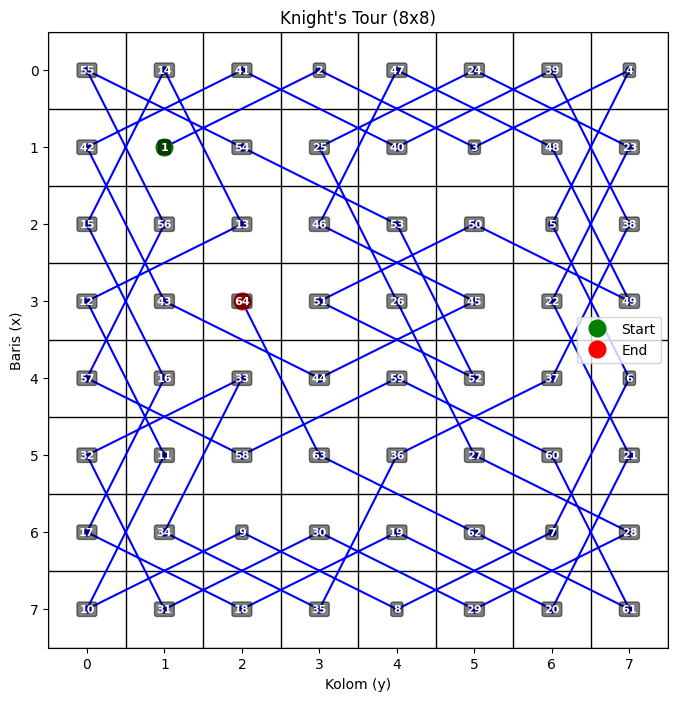

In [ ]:
import matplotlib.pyplot as plt
import sys

# Tingkatkan batas rekursi untuk keamanan (meskipun Warnsdorff jarang butuh deep recursion)
sys.setrecursionlimit(2000)

class KnightsTour:
    def __init__(self, size=8):
        self.n = size
        # 8 kemungkinan gerakan kuda (L-shape)
        self.moves = [
            (2, 1), (1, 2), (-1, 2), (-2, 1),
            (-2, -1), (-1, -2), (1, -2), (2, -1)
        ]
        self.board = [[-1 for _ in range(size)] for _ in range(size)]
        self.path = []

    def is_valid(self, x, y):
        """Mengecek apakah langkah berada di dalam papan dan belum dikunjungi."""
        return 0 <= x < self.n and 0 <= y < self.n and self.board[x][y] == -1

    def solve(self, start_x, start_y):
        """Fungsi utama untuk mencari solusi."""
        # Reset board
        self.board = [[-1 for _ in range(self.n)] for _ in range(self.n)]
        self.path = []

        # Langkah pertama
        self.board[start_x][start_y] = 0
        self.path.append((start_x, start_y))

        if self.solve_util(start_x, start_y, 1):
            return True
        return False

    def solve_util(self, x, y, move_count):
        """Fungsi rekursif dengan Heuristik Warnsdorff."""
        if move_count == self.n * self.n:
            return True

        # Cari semua langkah yang mungkin
        next_moves = []
        for dx, dy in self.moves:
            nx, ny = x + dx, y + dy
            if self.is_valid(nx, ny):
                # Hitung degree (jumlah langkah selanjutnya yang mungkin)
                degree = 0
                for ddx, ddy in self.moves:
                    # Cek validitas langkah berikutnya dari nx, ny
                    if 0 <= nx + ddx < self.n and 0 <= ny + ddy < self.n and self.board[nx+ddx][ny+ddy] == -1:
                        degree += 1
                next_moves.append((degree, nx, ny))

        # Heuristik Warnsdorff: Urutkan berdasarkan degree terendah (ascending)
        next_moves.sort(key=lambda x: x[0])

        for _, nx, ny in next_moves:
            self.board[nx][ny] = move_count
            self.path.append((nx, ny))

            if self.solve_util(nx, ny, move_count + 1):
                return True

            # Backtracking
            self.board[nx][ny] = -1
            self.path.pop()

        return False

    def visualize_tour(self):
        """Membuat grafik visualisasi perjalanan kuda."""
        if not self.path:
            print("Tidak ada jalur untuk divisualisasikan.")
            return

        fig, ax = plt.subplots(figsize=(8, 8))

        # Gambar Grid Papan Catur
        for x in range(self.n + 1):
            ax.plot([x, x], [0, self.n], color='black', linewidth=1)
            ax.plot([0, self.n], [x, x], color='black', linewidth=1)

        # Koordinat jalur (+0.5 agar titik di tengah kotak)
        path_x = [p[1] + 0.5 for p in self.path] # Kolom adalah sumbu X
        path_y = [self.n - p[0] - 0.5 for p in self.path] # Baris adalah sumbu Y (dibalik agar baris 0 di atas)

        # Plot garis perjalanan
        ax.plot(path_x, path_y, color='blue', marker='o', markersize=5, linestyle='-')

        # Tandai Awal (Hijau) dan Akhir (Merah)
        ax.plot(path_x[0], path_y[0], 'go', markersize=12, label='Start')
        ax.plot(path_x[-1], path_y[-1], 'ro', markersize=12, label='End')

        # Beri nomor urut langkah
        for i, (px, py) in enumerate(zip(path_x, path_y)):
            ax.text(px, py, str(i+1), color='white',
                    ha='center', va='center', fontsize=8, fontweight='bold',
                    bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.2'))

        ax.set_xlim(0, self.n)
        ax.set_ylim(0, self.n)
        # Label sumbu agar sesuai matriks (0-7)
        ax.set_xticks([i + 0.5 for i in range(self.n)])
        ax.set_xticklabels(range(self.n))
        ax.set_yticks([self.n - i - 0.5 for i in range(self.n)])
        ax.set_yticklabels(range(self.n))

        ax.set_xlabel("Kolom (y)")
        ax.set_ylabel("Baris (x)")

        plt.title(f"Knight's Tour ({self.n}x{self.n})")
        plt.legend()
        plt.show()

# --- BAGIAN INPUT USER ---
if __name__ == "__main__":
    tour = KnightsTour(8) # Papan 8x8

    print("=== PROGRAM KNIGHT'S TOUR ===")
    print("Papan Catur ukuran 8x8 (Indeks 0 s.d 7)")
    print("---------------------------------------")

    while True:
        try:
            # Meminta input dari user
            raw_x = input("Masukkan Baris Awal (0-7) : ")
            raw_y = input("Masukkan Kolom Awal (0-7) : ")

            start_x = int(raw_x)
            start_y = int(raw_y)

            # Validasi input
            if 0 <= start_x < 8 and 0 <= start_y < 8:
                break # Keluar dari loop jika input benar
            else:
                print("Error : Angka harus antara 0 sampai 7! Silakan coba lagi.\n")

        except ValueError:
            print("Error : Masukkan harus berupa angka bulat! Silakan coba lagi.\n")

    print(f"\nMenghitung jalur mulai dari posisi [{start_x}, {start_y}]...")

    if tour.solve(start_x, start_y):
        print("Solusi DITEMUKAN!")

        # Cek tipe Tour
        last_x, last_y = tour.path[-1]
        diff_x = abs(last_x - start_x)
        diff_y = abs(last_y - start_y)

        # Kuda bergerak L (selisih x=1 & y=2 ATAU x=2 & y=1)
        if (diff_x == 1 and diff_y == 2) or (diff_x == 2 and diff_y == 1):
            print(">> Tipe : CLOSED TOUR (Membentuk siklus tertutup).")
        else:
            print(">> Tipe : OPEN TOUR (Berakhir di kotak sembarang).")

        print("Menampilkan visualisasi...")
        tour.visualize_tour()
    else:
        print("Maaf, solusi tidak ditemukan untuk posisi awal tersebut.")

**Ringkasan Algoritma :**


1.   Heuristik Warnsdorff : Selalu memilih langkah dengan derajat (jumlah langkah valid berikutnya) terkecil
2.   Backtracking : Jika menemui jalan buntu, mundur dan coba alternatif lain
3.   Keunggulan : Mengurangi kemungkinan terjebak dan mempercepat pencarian solusi

Program ini menyelesaikan masalah Knight's Tour dengan dua mode (Open/Closed) menggunakan algoritma heuristik yang efisien dan dilengkapi visualisasi grafis.
